In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.dataloader import DataLoader

from datasets import CopyTaskDataset
from experiment import FunctionExperiment
from model import PowerLawLSTM
import matplotlib.pyplot as plt
from metric import accuracy
import pickle
%matplotlib inline


In [2]:
# Check if GPU is enabled
USE_CUDA = torch.cuda.is_available()
# device = torch.device("cpu")
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)

cpu


In [14]:
rnd_seed=10
torch.manual_seed(rnd_seed)

p=0.01
model_name = 'pLSTM_test'
hidden_state_size = 128
target_num=10
p_range = [0,1]
model = PowerLawLSTM(hidden_size = hidden_state_size, input_size = target_num, output_size=target_num, p_range=p_range, learn_p=True, uniform_init=True).to(device)
optimizer = optim.RMSprop
batch_size = 128
max_epochs = 5
clip_gradients = 1.0
lr = 1e-3

In [15]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

lstm.layer_aux.layer1.weight_ih tensor([[-0.0074, -0.0030, -0.0331,  ...,  0.0830,  0.0208, -0.0300],
        [ 0.0085, -0.0099,  0.0361,  ..., -0.0031,  0.0203, -0.0006],
        [-0.0085, -0.0782, -0.0762,  ..., -0.0797, -0.0829,  0.0387],
        ...,
        [ 0.0609, -0.0596,  0.0477,  ...,  0.0415,  0.0772, -0.0115],
        [-0.0184, -0.0483, -0.0055,  ...,  0.0871,  0.0672,  0.0272],
        [ 0.0337, -0.0473,  0.0249,  ...,  0.0569, -0.0664,  0.0070]])
lstm.layer_aux.layer1.weight_hh tensor([[-0.0635, -0.0788,  0.0440,  ..., -0.0416,  0.0016,  0.0452],
        [-0.0778, -0.0800,  0.0809,  ...,  0.0418, -0.0148, -0.0344],
        [ 0.0671, -0.0639,  0.0004,  ...,  0.0072,  0.0040,  0.0040],
        ...,
        [-0.0724, -0.0448,  0.0083,  ...,  0.0752, -0.0244,  0.0246],
        [-0.0495, -0.0059,  0.0195,  ...,  0.0642,  0.0487, -0.0513],
        [ 0.0338, -0.0475, -0.0666,  ..., -0.0223,  0.0695,  0.0065]])
lstm.layer_aux.layer1.bias tensor([ 4.0397e-02,  7.3229e-03,  7.4028

In [16]:
train_samples = 10000
test_samples = 1000
T =50
seq_length = T+20-1

dataset = CopyTaskDataset
train_dataset = {
    'samples': train_samples,
    'T': T,
    'seq_length':seq_length,
#     'path':'.'
}

test_dataset = {
    'samples': test_samples,
    'T': T,
    'seq_length':seq_length,
#     'path':'.'
}

cpu
cpu
Starting Epoch 0
Batch 0 Loss: 2.3556246757507324 mean loss 2.3556246757507324
Batch 10 Loss: 1.0266743898391724 mean loss 1.741758021441373
Batch 20 Loss: 0.8926359415054321 mean loss 1.3594213866052174
Batch 30 Loss: 0.8341130614280701 mean loss 1.1976391999952254
Batch 40 Loss: 0.7923016548156738 mean loss 1.1032457875042427
Batch 50 Loss: 0.7563055753707886 mean loss 1.0384151877141465
Batch 60 Loss: 0.7146205306053162 mean loss 0.9884974858799919
Batch 70 Loss: 0.6548112630844116 mean loss 0.9455312347747911
Accuracy1:  tensor(0.) Accuracy2: tensor(0.)
Validation loss:  0.5922493860125542
Starting Epoch 1
Batch 0 Loss: 0.5924928188323975 mean loss 0.5924928188323975
Batch 10 Loss: 0.5524632930755615 mean loss 0.5588469071821733
Batch 20 Loss: 0.5251362323760986 mean loss 0.5409899694578988
Batch 30 Loss: 0.5037334561347961 mean loss 0.5290028529782449
Batch 40 Loss: 0.48797282576560974 mean loss 0.5199689785154854
Batch 50 Loss: 0.4755546450614929 mean loss 0.5126005709171

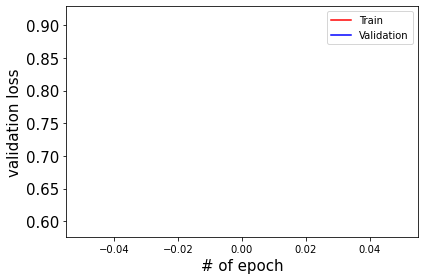

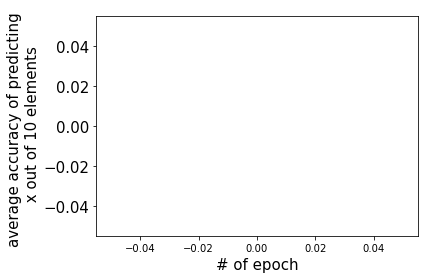

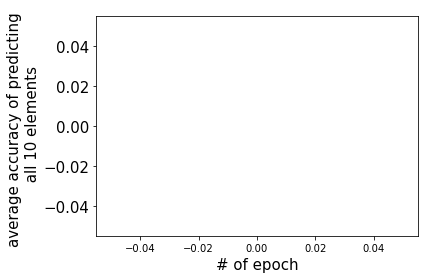

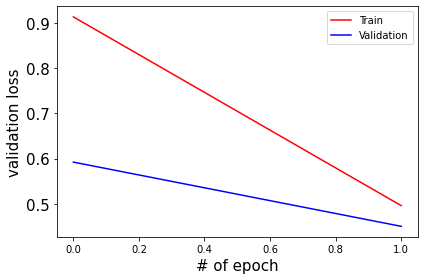

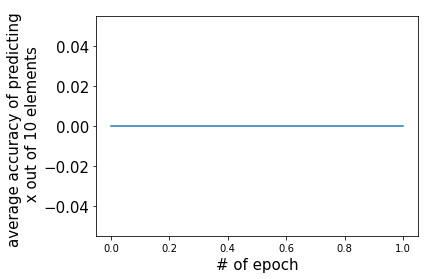

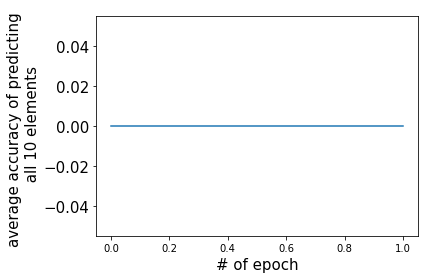

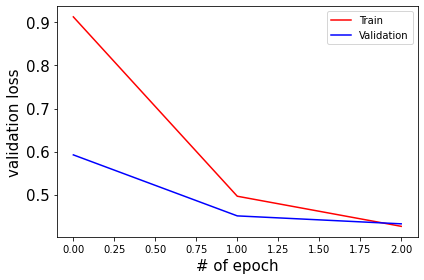

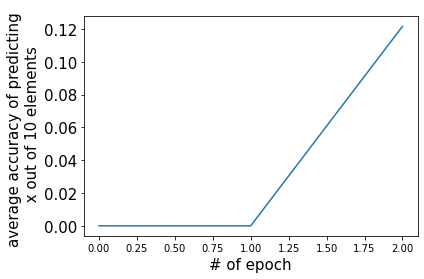

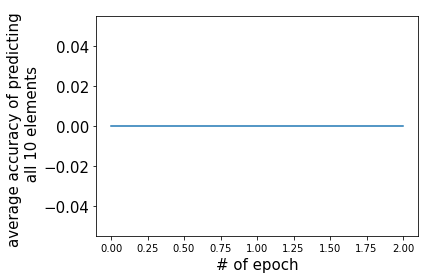

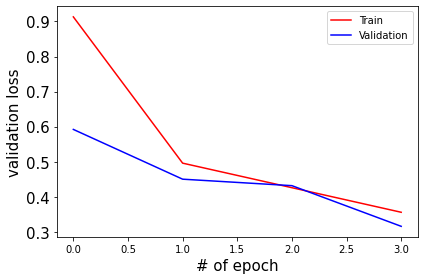

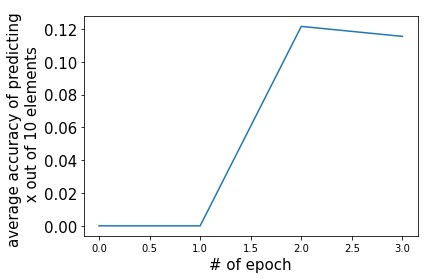

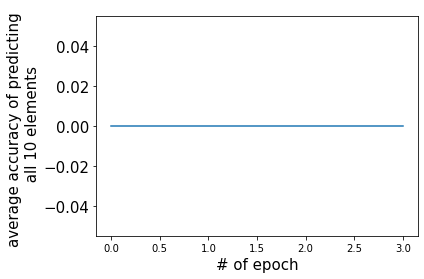

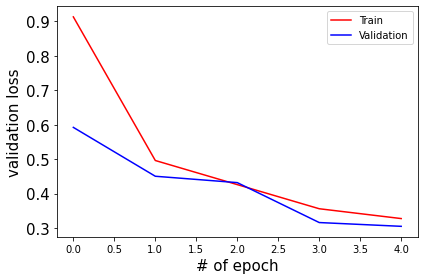

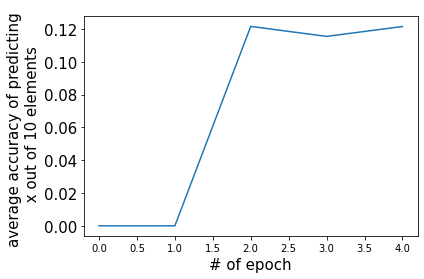

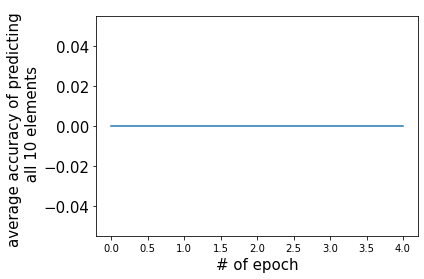

In [17]:
experiment = FunctionExperiment(dataset, model, model_name,optimizer, metric=accuracy, train_data_parameters=train_dataset,\
                        test_data_parameters=test_dataset,batch_size=batch_size, lr=lr, max_epochs=max_epochs, \
                                clip_gradients=clip_gradients, device=device, print_steps=10)


results = experiment.train_model()
